In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Load the dataset
insurance_df = pd.read_csv("/Users/balakrishnamupparaju/Downloads/insurance.csv")


# Inspect the dataset
print(insurance_df.info())
print(insurance_df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
# Check for missing values
print(insurance_df.isnull().sum())

# Data types of variables
print(insurance_df.dtypes)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [5]:
print(insurance_df.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [9]:
# Convert categorical variables
insurance_df['smoker'] = insurance_df['smoker'].map({'yes': 1, 'no': 0})
insurance_df['sex'] = insurance_df['sex'].map({'male': 1, 'female': 0})  # Not a primary variable but useful later
insurance_df['region'] = insurance_df['region'].astype('category').cat.codes  # Encode region as numbers



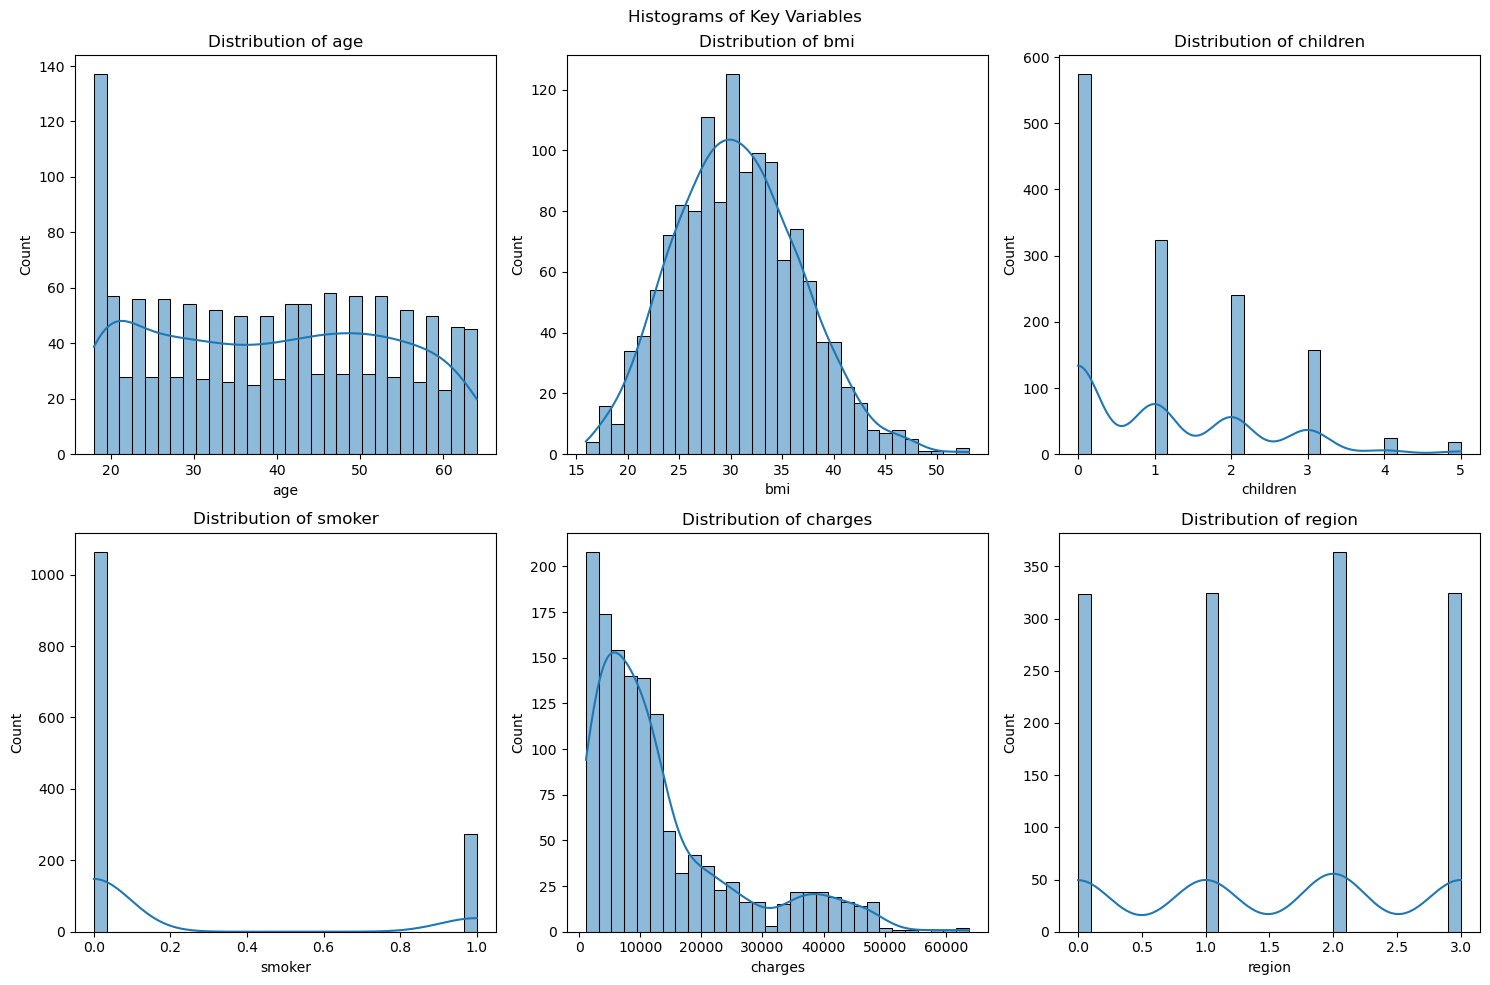

In [13]:
# Plot histograms for key variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Histograms of Key Variables')

columns = ['age', 'bmi', 'children', 'smoker', 'charges','region']
for i, col in enumerate(columns):
    sns.histplot(insurance_df[col], bins=30, kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()


In [15]:
# Summary statistics
insurance_df.describe()


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [ ]:
#Look at mean, median, and standard deviation.
#Identify potential outliers in BMI and charges.
C#heck the skewness of charges (often right-skewed).

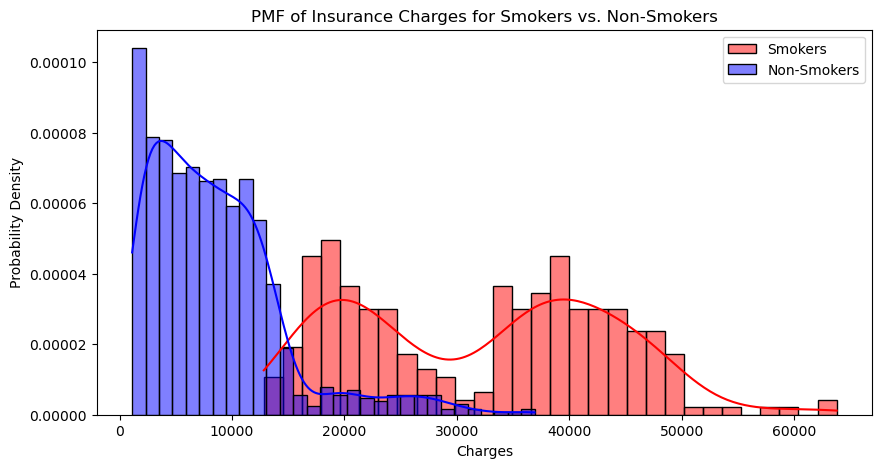

In [19]:
# PMF for smokers vs. non-smokers (charges)
smoker_charges = insurance_df[insurance_df['smoker'] == 1]['charges']
non_smoker_charges = insurance_df[insurance_df['smoker'] == 0]['charges']

# Plot the PMF
plt.figure(figsize=(10, 5))
sns.histplot(smoker_charges, bins=30, kde=True, color='red', label='Smokers', stat="density")
sns.histplot(non_smoker_charges, bins=30, kde=True, color='blue', label='Non-Smokers', stat="density")

plt.legend()
plt.title("PMF of Insurance Charges for Smokers vs. Non-Smokers")
plt.xlabel("Charges")
plt.ylabel("Probability Density")
plt.show()


In [ ]:
#Smokers have significantly higher insurance charges.
#The distribution shifts right, indicating a strong effect.

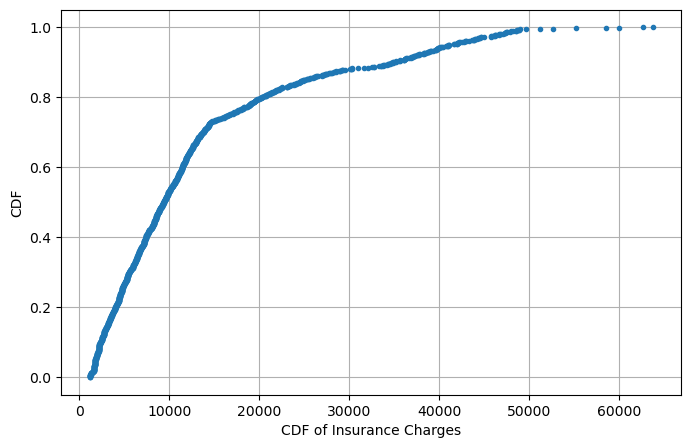

In [23]:
# Compute CDF
def plot_cdf(data, title):
    sorted_data = np.sort(data)
    y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, y, marker='.', linestyle='none')
    plt.xlabel(title)
    plt.ylabel('CDF')
    plt.grid()

plt.figure(figsize=(8, 5))
plot_cdf(insurance_df['charges'], "CDF of Insurance Charges")
plt.show()


In [ ]:
#A steep rise indicates where most people’s charges are concentrated.
#This helps understand the distribution and percentiles.

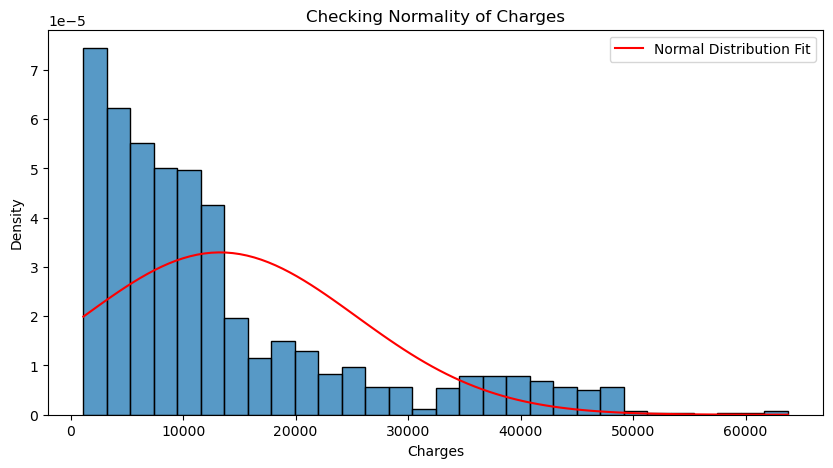

In [29]:
# Fit a normal distribution to charges
mu, sigma = stats.norm.fit(insurance_df['charges'])

# Plot the histogram with the normal distribution curve
plt.figure(figsize=(10, 5))
sns.histplot(insurance_df['charges'], bins=30, kde=False, stat="density")
x = np.linspace(min(insurance_df['charges']), max(insurance_df['charges']), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='Normal Distribution Fit', color='red')

plt.title('Checking Normality of Charges')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
#The actual distribution is right-skewed, not normally distributed.
#This confirms outliers affect charges.

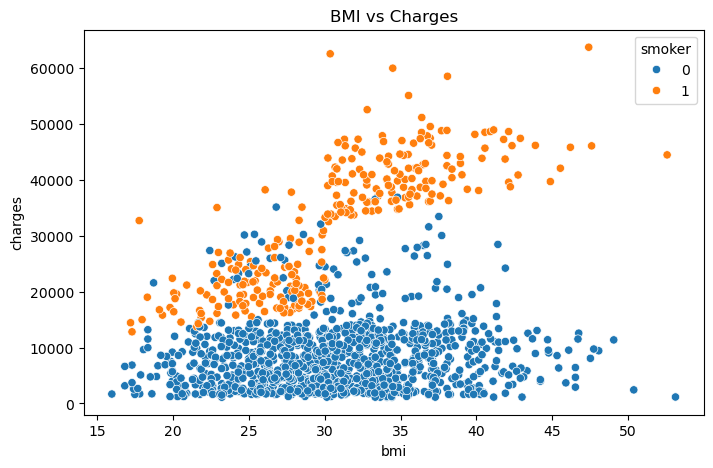

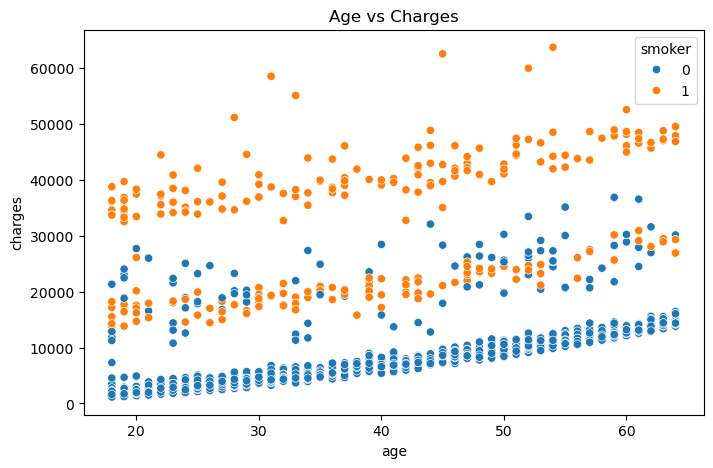

              age       bmi   charges
age      1.000000  0.109272  0.299008
bmi      0.109272  1.000000  0.198341
charges  0.299008  0.198341  1.000000


In [33]:
# Scatter plot: BMI vs. Charges
plt.figure(figsize=(8, 5))
sns.scatterplot(x=insurance_df['bmi'], y=insurance_df['charges'], hue=insurance_df['smoker'])
plt.title("BMI vs Charges")
plt.show()

# Scatter plot: Age vs. Charges
plt.figure(figsize=(8, 5))
sns.scatterplot(x=insurance_df['age'], y=insurance_df['charges'], hue=insurance_df['smoker'])
plt.title("Age vs Charges")
plt.show()

# Pearson correlation
print(insurance_df[['age', 'bmi', 'charges']].corr())


In [ ]:
#BMI vs. Charges: A weak trend, but smokers have higher charges.
#Age vs. Charges: Slight positive correlation.

In [37]:
# Perform a t-test
#Testing if smokers have significantly higher charges.



t_stat, p_val = stats.ttest_ind(smoker_charges, non_smoker_charges)

print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("Reject Null Hypothesis: Smoking significantly affects charges.")
else:
    print("Fail to Reject Null Hypothesis: No significant effect.")


T-Statistic: 46.66492117272371, P-Value: 8.271435842179101e-283
Reject Null Hypothesis: Smoking significantly affects charges.


In [41]:
# Simple Linear Regression
model = smf.ols('charges ~ bmi', data=insurance_df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           2.46e-13
Time:                        16:00:19   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1192.9372   1664.802      0.717      0.4

In [45]:
# Multiple Regression
model = smf.ols('charges ~ age + bmi + smoker', data=insurance_df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Sat, 01 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:00:52   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.168e+04    937.569    -12.454      0.0

In [37]:
import statsmodels.api as sm

# Define independent variables (X) and dependent variable (y)
X = insurance_df[['age', 'bmi', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']]
y = insurance_df['charges']

# Add a constant for the regression intercept
X = sm.add_constant(X)


In [39]:
# Fit the regression model
model = sm.OLS(y, X).fit()

# Display regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     660.8
Date:                Sat, 01 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:34:21   Log-Likelihood:                -13554.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1331   BIC:                         2.716e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.16e+04    976.200  

In [ ]:
#Smoking is the strongest predictor of charges.
#BMI has a mild effect but interacts with smoking.
#Age slightly influences charges.